# **< 의사 결정 나무(Decision Tree) >**

In [20]:
%load_ext watermark
%watermark -v -p sklearn,numpy,mglearn,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.18.1

sklearn: 0.23.1
numpy  : 1.19.1
mglearn: 0.1.9
seaborn: 0.11.1



#### 실습에 앞서서 실습폴더 내에 존재하는 Graphviz 설치파일을 통해서 Graphviz를 설치해보도록 하겠습니다.

- GraphViz : http://www.graphviz.org/
- 오픈소스 다이어그램 생성기
- 의사결정나무모델의 학습과정을 시각화화여 확인하기 위한 다이어그램 생성을 위해서 설치가 요구됩니다.



## **Graphviz 설치방법**

1.  graphviz 다운  
https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/ : 실습파일 폴더 내에 확인

2. 해당 설치파일 설치 과정에서...  
<img src = "./fig/0_graphviz설치.PNG" width="50%"><br>
- Add Graphviz to the system PATH for current user를 선택 → 나중에 사용자변수 PATH를 지정할 필요없어서 편함!

3. 아나콘다 터미널을 통해 graphviz 설치  
```!pip install graphviz```
 

In [21]:
# !pip install mglearn
# !pip install graphviz

#### 수업시간에 소개드린 의사결정나무 알고리즘에 대해서, 간단한 예제를 통해서 이에 대한 이해를 도와드릴수 있도록 하겠습니다.

결정 나무의 구조에 대해서 알아보고자 지난 시간에 활용한 __'mglearn'__ 라이브러리를 이용해서 이해를 돕도록 하겠습니다.

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd 
import mglearn


## 스무고개? Rule Based? 의사결정나무 

머신러닝 식으로 말하면 세 개의 특성 “날개가 있나요?”, “날 수 있나요?”, “지느러미가 있나요?”를 사용해서,  
네 개의 클래스(매, 펭귄, 돌고래, 곰)를 구분하는 모델을 만든 것입니다.  
이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습할 수 있습니다.

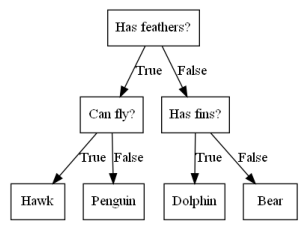

In [23]:
mglearn.plots.plot_animal_tree()

## 2차원 예제 데이터(Two-moon)를 활용한 의사결정나무 분류 결정 경계면

2차원 데이터셋을 분류하는 결정 트리를 만들어보겠습니다.  
이 데이터셋은 각 클래스에 데이터 포인트가 50개씩 있고 반달 두 개가 포개진 듯한 모양을 하고 있습니다.  
이 데이터셋을 two_moons라고 하겠습니다.

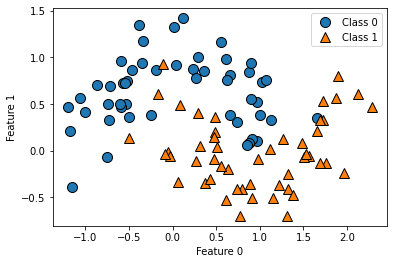

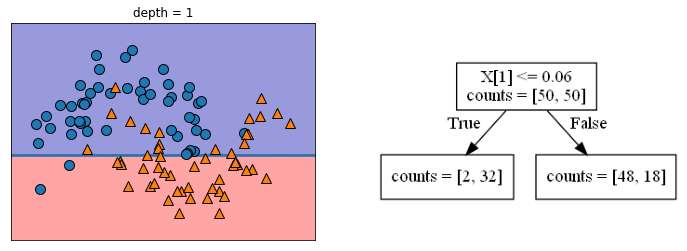

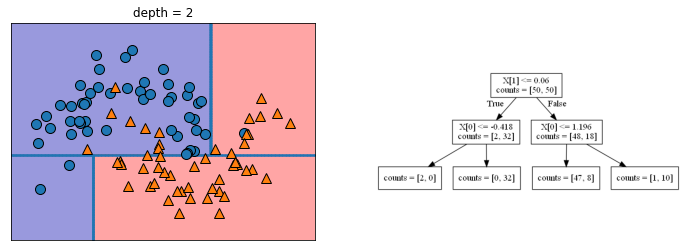

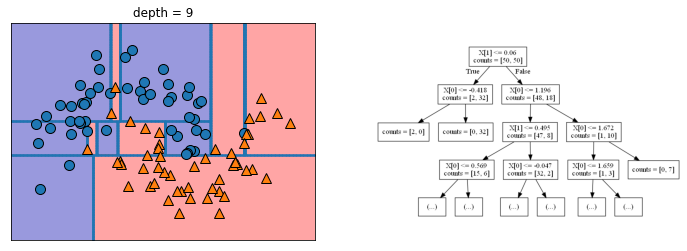

In [24]:
mglearn.plots.plot_tree_progressive()

## 가지치기(prunning) 을 통한 모델의 일반화 성능 끌어올리기

일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과적합됩니다.  
순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미입니다.  
즉, 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있습니다.  
상기 분류결정 경계면을 확인시, 왼쪽 그래프가 과적합된 것으로 볼 수 있습니다.  
클래스 0으로 결정된 영역이 클래스 1에 속한 포인트들로 둘러쌓인 것을 볼 수 있습니다.  

이러한 __<font color='red'> 과적합(Overfitting)을 방지</font>__ 하기위해서 사전에 가지의 수를 정의하고 모델을 학습해보도록 하겠습니다.  
이러한 과정을 <font color='blue'>'사전가지치기(pre-pruning)'</font> 라고 합니다.


### Defualt 셋팅(Full-tree)로 의사결정나무(분류)를 구성시,

Full-tree로 의사결정나무를 구성하여 유방암데이터의 학습 데이터와 검증 데이터의 예측 성능을 평가해보도록 하겠습니다.  
의사결정나무 역시 __'sklearn'__ 라이브러리에서 지원하고있습니다.  

Documentation : http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

문서를 통해서 각 파라미터에 대해서 알아보겠습니다.


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 유방암 데이터

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### 사전에 의사결정나무의 깊이를 제한(사전-가지치기)할 경우,

동일한 데이터(유방암데이터)를 활용하여, 이를 Pruning을 수행한 이후, 학습 데이터와 검증 데이터의 예측 성능을 평가해보도록 하겠습니다.

In [26]:
### Pruning 을 통한 Depth를 4로 제한.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)


print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


### 결정 트리 분석

sklearn을 이용하여 의사결정나무를 구성할경우, __'export_graphviz'__ 함수를 통해서 이를 시각화가 가능합니다.  
이를 이용하여  앞서 구성한 의사결정나무를 시각화 해보도록 하겠습니다. 

트리의 전체적인 구조를 시각화를 통해서 파악해 보도록 하겠습니다.


In [27]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Negative", "Positive"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

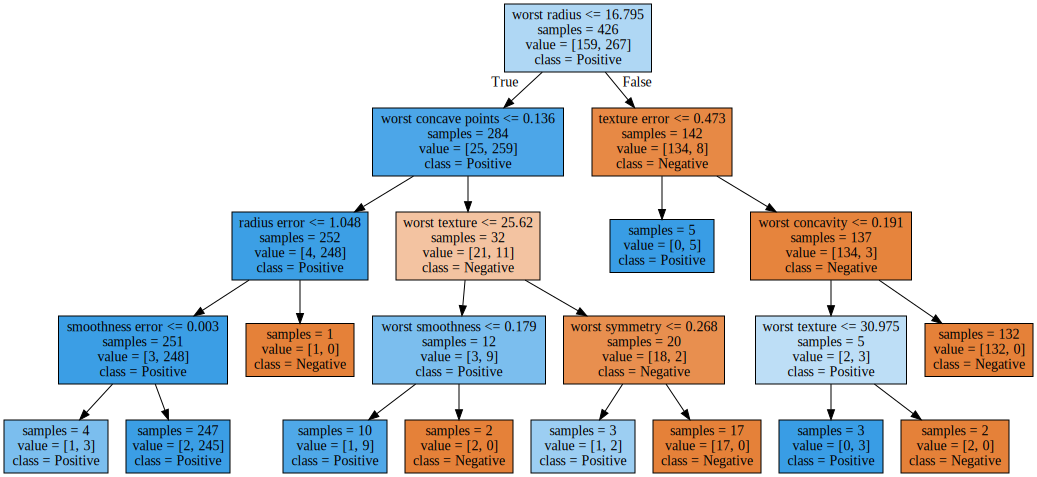

In [28]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

앞서서 의사결정나무의 시각화를 수행했다면, <font color='red'>자주 분기의 기점으로 사용되는 변수들</font>을 파악가능해집니다.  
일반적으로 해당 변수로 인해 낮아진 불순도 지수를 반영하게 되는데,  
 이것이 각 특성이 얼마나 중요한지를 평가하는 __특성 중요도(feature importance)__입니다.  



In [29]:
print(cancer.feature_names)
print("특성 중요도:\n{}".format(tree.feature_importances_))

c_fname = cancer.feature_names
c_fimp = tree.feature_importances_



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [30]:
### 중요도 테이블 만들어보기 ###
#---------------------------------------------------
cancer_importance_tb = pd.DataFrame({'Variable':c_fname , 'Importance': c_fimp}).sort_values('Importance',ascending=False)
#---------------------------------------------------
print(cancer_importance_tb)

                   Variable  Importance
20             worst radius    0.726829
27     worst concave points    0.122113
11            texture error    0.048398
21            worst texture    0.045816
26          worst concavity    0.018188
24         worst smoothness    0.014158
28           worst symmetry    0.011885
10             radius error    0.010197
14         smoothness error    0.002416
0               mean radius    0.000000
17     concave points error    0.000000
25        worst compactness    0.000000
23               worst area    0.000000
22          worst perimeter    0.000000
19  fractal dimension error    0.000000
18           symmetry error    0.000000
15        compactness error    0.000000
16          concavity error    0.000000
1              mean texture    0.000000
13               area error    0.000000
12          perimeter error    0.000000
9    mean fractal dimension    0.000000
8             mean symmetry    0.000000
7       mean concave points    0.000000


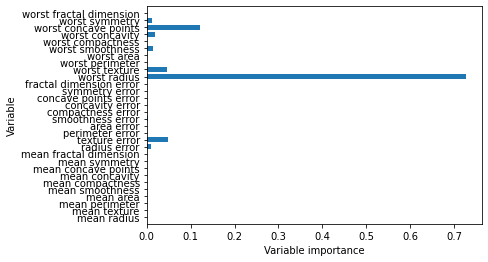

In [31]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Variable importance")
    plt.ylabel("Variable")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### 의사결정나무의 단점

의사결정나무의 경우 결국 분기 시점을 기준으로 2개의 자식노드를 생성하기 때문에 선형으로 분류가 불가능한 경우, 그 성능이 저하될 우려가 있습니다.

Feature importances: [0. 1.]


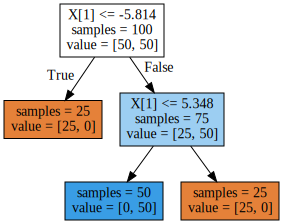

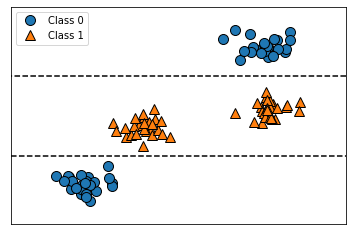

In [32]:
tree = mglearn.plots.plot_tree_not_monotone() ## 이진 분류가 불가능한 데이터 생성하기
display(tree)

### Ram가격 데이터를 활용한 의사결정나무 회귀 예시

의사결정나무는 앞서 소개한 분류 뿐만아니라, 회귀에서도 사용가능합니다.  
2000년 전까지의 데이터로부터 2000년 후의 가격을 예측해보겠습니다.   
여기서는 간단한 두 모델 DecisionTreeRegressor와 LinearRegression을 비교해보겠습니다.   
가격을 로그 스케일로 바꾸었기 때문에 비교적 선형적인 관계를 가집니다.  

로그 스케일로 바꾸어도 DecisionTreeRegressor를 사용하는 데는 아무런 차이가 없지만 LinearRegression에는 큰 차이가 있습니다.  
모델을 훈련시키고 예측을 수행한 다음 로그 스케일을 되돌리기 위해 지수 함수를 적용합니다.   
그래프 표현을 위해 전체 데이터셋에 대해 예측을 수행하였지만 테스트 데이터셋과의 비교를 수행해보도록 하겠습니다.



Text(0, 0.5, 'Price ($/Mbyte)')

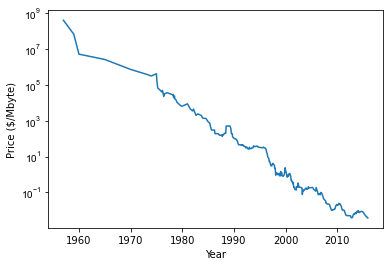

In [33]:
import os
ram_prices = pd.read_csv('./data/ram_price.csv')


plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

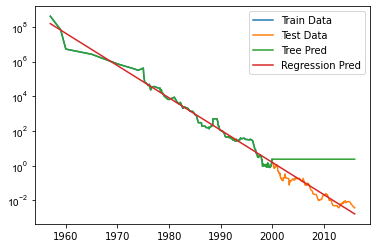

In [35]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="Train Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Pred")
plt.semilogy(ram_prices.date, price_lr, label="Regression Pred")
plt.legend()

### **결과 해석**

두 모델은 확연한 차이를 보입니다. 선형 모델은 우리가 아는 대로 직선으로 데이터를 근사하였습니다.   
선형 회귀 모형의 경우, __비교적 정확히__ ram의 가격을 잘 예측합니다.   

반면에, 트리 모델은 훈련 데이터를 완벽하게 예측합니다. 
트리의 복잡도에 제한을 두지 않아서 전체 데이터셋을 모두 기억하기 때문입니다.   
그러나 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해 예측하는 게 전부입니다.   


### <font color='red'> **트리 모델은 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없기 때문입니다!** </font>

# **<의사결정나무를 활용한 분류 예제 실습1>**

## WDBC 데이터를 활용해서 유방암의 음성/양성 여부를 분류하는 의사결정 나무 모델 실습

**scikit-learn** 패키지에서 제공하는 **sklearn.tree()** 함수를 이용하여 유방암의 음성/양성 여부를 분류하는 실습을 수행해보도록 하겠습니다.

<img src='./fig/1_WDBC데이터설명.PNG' width="50%">

In [40]:
#필요한 패키지와 라이브러리를 가져옴
import numpy as np 
import pandas as pd 
import os #운영체제에서 제공되는 여러 기능 수행 예)파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 구하고자 할 때

# 시각화 관련 툴
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 

In [41]:
data = pd.read_csv('./data/Classification_4_wdbc_data.csv')
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [42]:
# 데이터프레임 shape
print("- Data has {} rows and {} columns.".format(*data.shape))

- Data has 569 rows and 32 columns.


In [43]:
# 10개 변수 값의 Mean값 정보 + id + diagnosis 정보만 사용하여 간단히 분석 실행
data = data.iloc[:,:12]
# data = data.loc[:,['id','diagnosis','radius_mean','texture_mean']]

In [44]:
data.shape

(569, 12)

In [45]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [46]:
data.columns = ['ID','Diagnosis','Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness',\
                'Concavity','Concave points', 'Symmetry', 'Fractal dimension']

In [47]:
# Missing value 확인
# data.isnull()
check_missing = lambda x: x.isnull().sum()
data.apply(check_missing)

ID                   0
Diagnosis            0
Radius               0
Texture              0
Perimeter            0
Area                 0
Smoothness           0
Compactness          0
Concavity            0
Concave points       0
Symmetry             0
Fractal dimension    0
dtype: int64

In [48]:
data.dtypes

ID                     int64
Diagnosis             object
Radius               float64
Texture              float64
Perimeter            float64
Area                 float64
Smoothness           float64
Compactness          float64
Concavity            float64
Concave points       float64
Symmetry             float64
Fractal dimension    float64
dtype: object

In [49]:
# id를 데이터 index로 만들기
data.set_index(['ID'], inplace = True)

In [50]:
data.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,Fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [51]:
# 전처리를 수행한 데이터 csv로 저장해보기 
data.to_csv('./data/preprocessed_wdbc.csv')

In [52]:
# X와 y 데이터 나누기
y = data['Diagnosis']
# y = data.Diagnosis
X = data.drop(['Diagnosis'],axis=1)

C:\Users\seok\.conda\envs\hynix\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


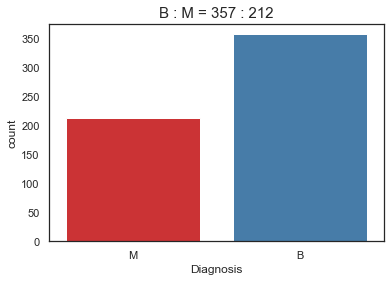

In [53]:
# 양성 클래스와 음성 클래스 갯수 확인 및 시각화
sns.countplot(y, palette='Set1')
#sns.countplot(y) 
plt.title("B : M = {} : {}".format(*y.value_counts()),fontsize=15)
#plt.title("B : M = {} : {}".format(y.value_counts()[0],y.value_counts()[1]),fontsize=15)
plt.show()

In [54]:
# y를 'M':1, 'B':0으로 바꾸기
y = y.map({'M':1,'B':0})
# 보통 binary classification 관심 레이블을 1로 둠

<img src='fig/4_데이터분할.PNG' width="50%">

In [58]:
# 학습 (80%) & 검증 (10%) & 테스트 (10%) 셋으로 데이터 나누기
from sklearn.model_selection import train_test_split

# 학습데이터 : 비학습데이터 = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=3355)

# 검증데이터 : 테스트데이터 = 1:1
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    test_size=0.5,
                                                    stratify=y_test,
                                                    shuffle=True,
                                                    random_state=3355)

In [59]:
# 임의의 max_depth같도록 의사결정나무분류기 생성
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(criterion='gini',#'entropy'
                                random_state=3355,
                                max_depth=2,
                                min_samples_split=2,
                                min_samples_leaf=1)
# min_samples_split = the number of samples to split (ex) 15
# min_samples_leaf = the number of samples at a leat node (ex) 10
# 학습데이터로 모델 피팅
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=3355)

In [60]:
# 학습, 검증 데이터 예측
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)
y_train_pred[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

<img src='./fig/2_혼동행렬.png' width="50%">

<img src='./fig/3_혼동행렬2.png' width="50%">

In [61]:
# 혼동행렬(Confusion Matrix)를 통해서 예측성능 확인하기
from sklearn.metrics import confusion_matrix

# 학습데이터의 경우
confusion_matrix(y_train,y_train_pred)

array([[270,  15],
       [ 17, 153]], dtype=int64)

In [62]:
# 검증데이터의 경우
confusion_matrix(y_valid,y_valid_pred)

array([[34,  2],
       [ 2, 19]], dtype=int64)

In [63]:
# 혼동행렬으로부터 예측성능 추출하기
from sklearn.metrics import accuracy_score,f1_score

# 학습, 검증데이터 범주예측 결과 측정 지표 : 정확도
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
# 학습, 검증데이터 범주예측 결과 측정 지표 : f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

- Accuracy (Train)      : 0.9297
- Accuracy (Validation) : 0.9298
- F1 score (Train)      : 0.9053
- F1 score (Validation) : 0.9048


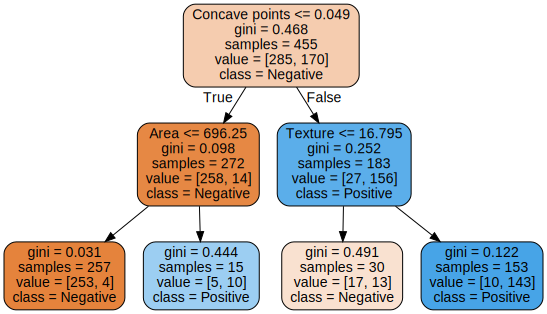

In [64]:
# export_graphviz : 의사결정나무를 DOT format으로 만들기
from sklearn.tree import export_graphviz
export_graphviz(clf_dt, out_file="clf_tree.dot", class_names=["Negative", "Positive"],
                feature_names=X.columns,filled=True,rounded=True,leaves_parallel=False)


# pruning이 안된 결과
import graphviz

with open("clf_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [65]:
# 가장 좋은 'max_depth' hyperparameter 값을 찾아보자
max_depths = list(range(1, 11, 1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=2017020558)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred))

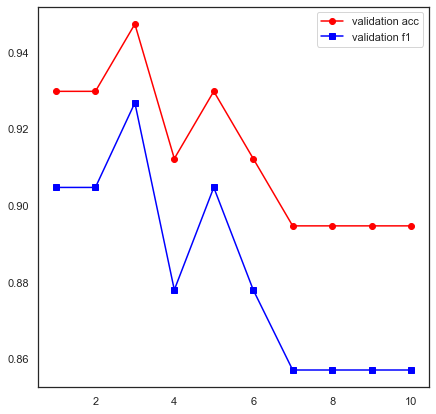

In [66]:
# 가장 좋은 'max_depth' hyperparameter 값 찾기위한 정확도, f1 그래프 그리기
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, validation_accs, color='red', marker='o', label='validation acc')
ax.plot(max_depths, validation_f1, color='blue', marker='s', label='validation f1')
ax.legend(loc='best')
plt.show(fig)

In [67]:
best_model_idx, best_model_f1 = max(enumerate(validation_f1), key=lambda p: p[1])
y_test_pred = dt_models[best_model_idx].predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.8947
- F1 score (Test) : 0.85


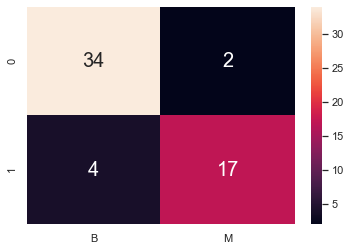

In [68]:
# Confusion matrix 그림 그려보기
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 20})

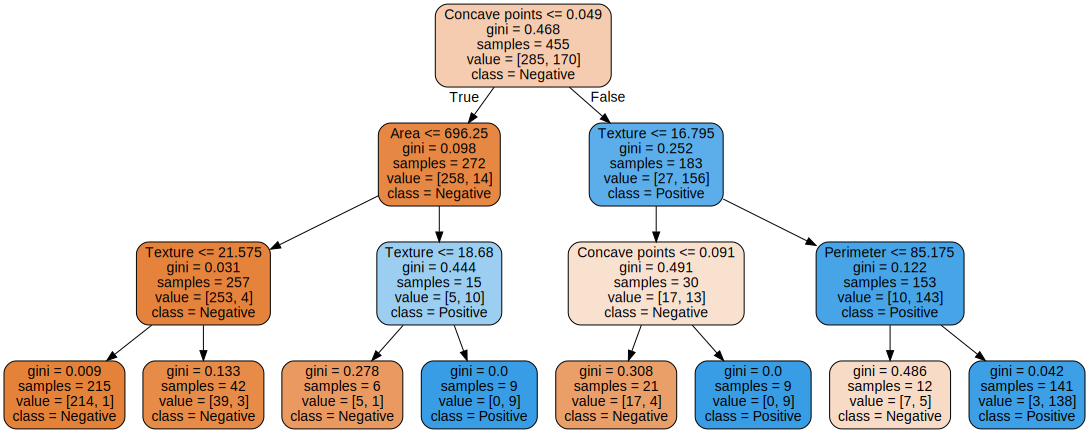

In [69]:
# Visualize the best decision tree model
export_graphviz(dt_models[best_model_idx],
                out_file="clf_tree(best).dot",
                class_names=["Negative", "Positive"],
                feature_names=X.columns,filled=True,rounded=True,leaves_parallel=False)


# pruning이 안된 결과
import graphviz

with open("clf_tree(best).dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [70]:
# 최종 모형의 변수 중요도 확인해보기
imp = dt_models[best_model_idx].feature_importances_

In [71]:
pd.DataFrame([X.columns, imp]).T

,0,1
0,Radius,0
1,Texture,0.0965744
2,Perimeter,0.0376551
3,Area,0.0647602
4,Smoothness,0
5,Compactness,0
6,Concavity,0
7,Concave points,0.80101
8,Symmetry,0
9,Fractal dimension,0


In [72]:
# 변수 중요도 확인해보기
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
imp = dt_models[best_model_idx].feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] != 0])

        variables importance
7  Concave points    0.80101
1         Texture  0.0965744
3            Area  0.0647602
2       Perimeter  0.0376551


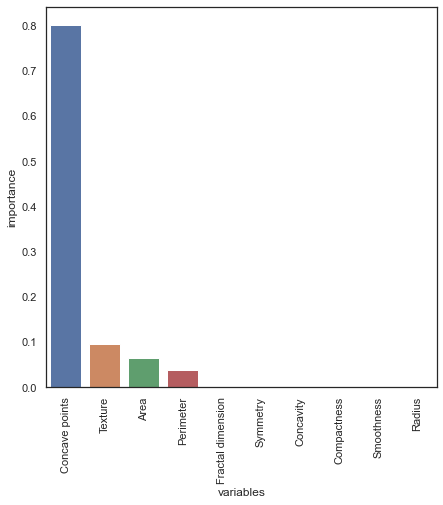

In [73]:
# 변수 중요도 그림 그리기
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90) # set property
plt.show(fig)

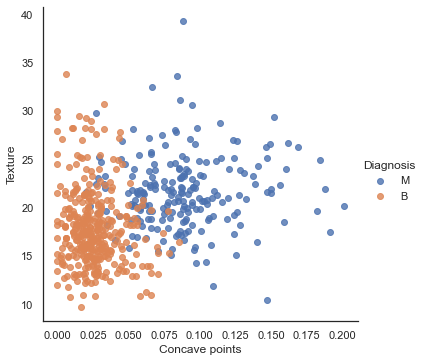

In [74]:
# 가장 중요했던 2가지 변수로 시각화 하기
sns.lmplot(x='Concave points', y='Texture',
           hue='Diagnosis', data=data, fit_reg=False)

# **<의사결정나무를 활용한 예측(regression) 예제 실습2>**

## kr_house 데이터를 활용해서 거래되는 주택의 가격을 예측하는 의사결정 나무 모델 실습

동일하게 **scikit-learn** 패키지에서 제공하는 **sklearn.tree()** 함수를 이용하여 거래되는 주택의 가격을 예측하는 실습을 수행해보도록 하겠습니다.

<img src='./fig/9.png' width=50%>

<img src='./fig/10.png' width=50%>

<img src='./fig/11.png' width=50%>

<img src='./fig/12.png' width=50%>

In [94]:
# 관련 모듈 부르기 및 시각화를 위한 셋팅
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set()
sns.set_style('white')
sns.set_color_codes(palette='dark') 


In [95]:
# 데이터 불러오기
data = pd.read_csv('./data/kc_house_data.csv')

In [96]:
print(data.head())

           id  zipcode      lat     long  bedrooms  bathrooms  floors  \
0  9106000005    98115  47.6747 -122.303         4       2.25     2.0   
1  5101400871    98115  47.6914 -122.308         2       1.75     1.0   
2  7923600250    98007  47.5951 -122.144         5       2.00     1.5   
3  4166600610    98023  47.3273 -122.370         3       2.00     1.0   
4  5057100110    98042  47.3584 -122.163         5       3.00     2.0   

   waterfront  grade  condition      date  sqft_living  sqft_lot  sqft_above  \
0           1      8          5  20150527         3750      5000        2440   
1           1      6          3  20150524         1390      6670         720   
2           1      7          3  20150515         1870      7344        1870   
3           1      7          4  20150514         1410     44866        1410   
4           1      9          3  20150514         3223      6371        3223   

   sqft_basement  yr_built  yr_renovated    price  
0           1310      1924  

In [97]:
data.shape

(16383, 18)

<img src='./fig/13.PNG' width=50%>

In [98]:
# 의미없는 'id','zipcode'변수 제거하기
data = data.drop(['id','zipcode'],axis=1)

In [99]:
print(data['date'].head())

0    20150527
1    20150524
2    20150515
3    20150514
4    20150514
Name: date, dtype: int64


In [100]:
year = []
for i in range(data.shape[0]):
    year.append(str(data.loc[i,'date'])[:4])

quarter = []
for i in range(data.shape[0]):    
    quarter.append(int(str(data.loc[i,'date'])[4:6])//4)
    
data['year'] = pd.Series(year)
data['quarter'] = pd.Series(quarter)

In [101]:
print(data[['year','quarter']].head(15))

    year  quarter
0   2015        1
1   2015        1
2   2015        1
3   2015        1
4   2015        1
5   2015        1
6   2015        1
7   2015        1
8   2015        1
9   2015        1
10  2015        1
11  2015        1
12  2015        1
13  2015        1
14  2015        1


<img src='./fig/14.PNG' width=50%>

In [102]:
data = pd.get_dummies(data,columns=['year','quarter'])
data = data.drop(['date'], axis=1)

In [103]:
data.columns

Index(['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'price', 'year_2014', 'year_2015',
       'quarter_0', 'quarter_1', 'quarter_2', 'quarter_3'],
      dtype='object')

In [104]:
data = data.drop(['year_2015','quarter_3'],axis=1)

In [105]:
data['yr_built'] = 2018-data['yr_built']

data.loc[data['yr_renovated'] == 0,'yr_renovated'] = 0
data.loc[data['yr_renovated'] != 0,'yr_renovated'] = 1

In [106]:
data = data[['lat', 'long', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'grade',
       'condition', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated','year_2014', 'quarter_0', 'quarter_1', 'quarter_2','price']]

In [107]:
data.head()

,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,year_2014,quarter_0,quarter_1,quarter_2,price
0,47.6747,-122.303,4,2.25,2.0,1,8,5,3750,5000,2440,1310,94,0,0,0,1,0,1310000
1,47.6914,-122.308,2,1.75,1.0,1,6,3,1390,6670,720,670,77,0,0,0,1,0,445500
2,47.5951,-122.144,5,2.00,1.5,1,7,3,1870,7344,1870,0,58,0,0,0,1,0,450000
3,47.3273,-122.370,3,2.00,1.0,1,7,4,1410,44866,1410,0,33,0,0,0,1,0,335000
4,47.3584,-122.163,5,3.00,2.0,1,9,3,3223,6371,3223,0,4,0,0,0,1,0,479349


In [108]:
# 전처리를 수행한 데이터 저장하기
data.to_csv('preprocessed_kc_house_data.csv')

<img src='./fig/15.PNG' width=50%>

In [110]:
# Price = y
X = data.drop(['price'],axis=1)
y = data['price']

# 학습데이터와 검증데이터를 7:3 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=3355)

In [111]:
# 학습데이터를 기준으로 정규화 함수를 정의하고 이를 통해서 검증데이터도 정규화 수행하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# 의사결정나무를 통한 회귀모형 정의하기
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=None,
                               random_state=3355)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=3355)

In [113]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 1979576.6361
- MSE (Test) : 46642980669.4450
- R square (Train)      : 1.0000
- R square (Test) : 0.6606


In [114]:
dt_reg = DecisionTreeRegressor(criterion="mse",
                               max_depth=10,
                               random_state=3355)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=3355)

In [115]:
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
print('- MSE (Train)      : {:.4f}'.format(mean_squared_error(y_train, y_train_pred)))
print('- MSE (Test) : {:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

print('- R square (Train)      : {:.4f}'.format(r2_score(y_train, y_train_pred)))
print('- R square (Test) : {:.4f}'.format(r2_score(y_test, y_test_pred)))

- MSE (Train)      : 10116126578.6409
- MSE (Test) : 39108145920.0192
- R square (Train)      : 0.9237
- R square (Test) : 0.7154


In [116]:
imp = dt_reg.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

      variables importance
6         grade   0.355724
8   sqft_living   0.300972
0           lat   0.177661
1          long  0.0806499
5    waterfront  0.0309243
9      sqft_lot  0.0180842
12     yr_built  0.0103997


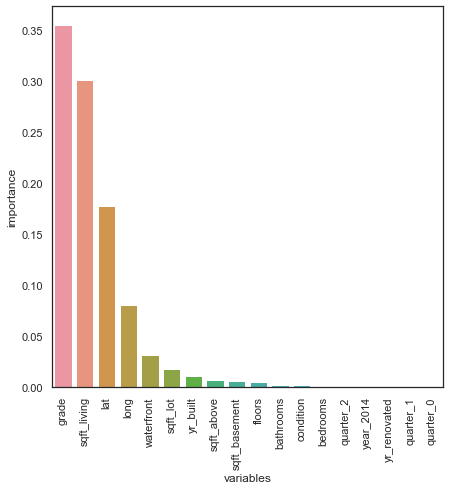

In [117]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

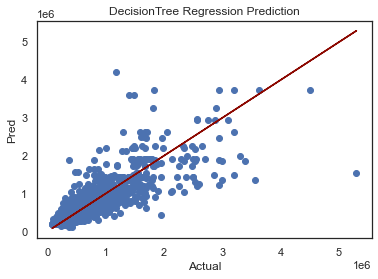

In [118]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r-')
plt.xlabel('Actual')
plt.ylabel('Pred')
plt.title('DecisionTree Regression Prediction')
plt.show()

# **<의사결정나무를 활용한 분류(classification) 예제 실습3>**

로지스틱 회귀분석 실습과정에서의 사용된 Personal Loan데이터셋을 통해서 로지스틱회귀분석과 의사결정나무분석의 결과를 비교해보도록 하겠습니다.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import itertools
import time



In [134]:
### Data 불러오기
ploan = pd.read_csv("./data/Personal Loan.csv")
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)
# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')

feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] 


### Metric Calculation
def perf_eval(cm):
    # True positive rate: TPR
    TPR = cm[1, 1] / sum(cm[1]) # recall
    # True negative rate: TNR
    TNR = cm[0, 0] / sum(cm[0])
    # Simple Accuracy
    ACC = (cm[0, 0] + cm[1, 1]) / sum(cm.reshape(-1,))
    # Balanced Correction Rate
    BCR = np.sqrt(TPR * TNR)
    # F1-measure
    Precision = cm[1,1] /sum(cm[:,1])
    F1 = 2*TPR*Precision/(TPR+Precision)
    return ([TPR, TNR, ACC, BCR, F1])

def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[ y>threshold]=1
    Y[ y<=threshold]=0
    return(Y.astype(int))




In [135]:
# 학습데이터와 검증데이터 7:3으로 나누기

train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=5959)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(1750, 12) (750, 12) (1750,) (750,)


### **1.Logistic Regression(full)**

In [136]:

lr_model = sm.Logit(train_y, train_x)
lrbase_results = lr_model.fit(method='newton')


Optimization terminated successfully.
         Current function value: 0.119081
         Iterations 9


#### 로지스틱 회귀 분석 모델 예측하기


In [139]:
pred_y_lr = lrbase_results.predict(test_x)

In [140]:
pred_y_lr

560     0.009937
141     0.000374
2199    0.000406
1107    0.001355
849     0.001937
          ...   
2094    0.001192
1169    0.001356
2490    0.980540
836     0.001717
1122    0.000046
Length: 750, dtype: float64

In [141]:
# Cut-off 동일하게 0.5
pred_Y_full= cut_off(pred_y_lr,0.5)


## **혼동행렬으로 표현**

In [143]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_full

array([[659,  14],
       [ 34,  43]], dtype=int64)

## **성능비교**

In [144]:
perf_mat = pd.DataFrame(columns=["TPR", "TNR", "ACC", "BCR","F1"],
                        index =['LR_FULL'])


perf_mat.loc['LR_FULL']=perf_eval(cfmat_full)


In [145]:
perf_mat

,TPR,TNR,ACC,BCR,F1
LR_FULL,0.558442,0.979198,0.936,0.739476,0.641791


## **Defualt DecisionTree 적합하기**

In [146]:
defualt_dt = DecisionTreeClassifier(criterion='gini',#'entropy'
                                random_state=3355)

In [147]:
defualt_dt.fit(train_x, train_y)

DecisionTreeClassifier(random_state=3355)

In [148]:
df_default_pred = defualt_dt.predict(test_x)

In [149]:
cfmat_dt_defualt = confusion_matrix(test_y,df_default_pred)

In [150]:
print(cfmat_dt_defualt)

[[659  14]
 [ 12  65]]


## **최적화된 데이터의 학습 DecisionTree 적합하기**

In [151]:
# 가장 좋은 'max_depth' hyperparameter 값을 찾아보자
max_depths = list(range(1, 15, 1))
test_accs = []
test_f1 = []
dt_models = []
for max_depth in max_depths:
    clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=3355)
    clf_dt.fit(train_x, train_y)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(test_x)
    test_accs.append(accuracy_score(test_y, y_valid_pred))
    test_f1.append(f1_score(test_y, y_valid_pred))

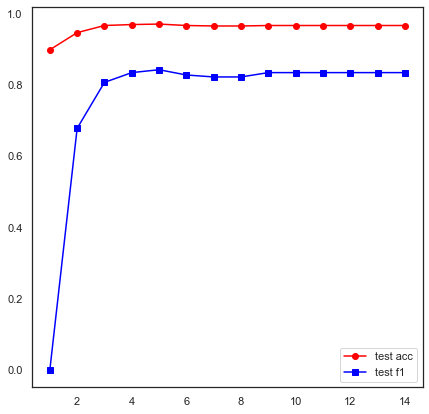

In [152]:
# 가장 좋은 'max_depth' hyperparameter 값 찾기위한 정확도, f1 그래프 그리기
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(max_depths, test_accs, color='red', marker='o', label='test acc')
ax.plot(max_depths, test_f1, color='blue', marker='s', label='test f1')
ax.legend(loc='best')
plt.show(fig)

In [155]:
best_model_idx, best_model_f1 = max(enumerate(test_f1), key=lambda p: p[1])
df_opt_pred = dt_models[best_model_idx].predict(test_x)

In [156]:
cfmat_dt_opt = confusion_matrix(test_y,df_opt_pred)

In [157]:
print(cfmat_dt_opt)

[[666   7]
 [ 16  61]]


In [158]:
perf_mat_summary = pd.DataFrame(columns=["TPR", "TNR", "ACC", "BCR","F1"],
                        index =['LR_FULL',
                               'DT_default','DT_tuned'])


perf_mat_summary.loc['LR_FULL']=perf_eval(cfmat_full)
perf_mat_summary.loc['DT_default']=perf_eval(cfmat_dt_defualt)
perf_mat_summary.loc['DT_tuned']=perf_eval(cfmat_dt_opt)



In [159]:
print(perf_mat_summary)

                 TPR       TNR       ACC       BCR        F1
LR_FULL     0.558442  0.979198     0.936  0.739476  0.641791
DT_default  0.844156  0.979198  0.965333  0.909173  0.833333
DT_tuned    0.792208  0.989599  0.969333   0.88542  0.841379
